## Proyecto EDA - Codigo

In [8]:
# Exploración de datos inicial
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargo el dataset
data = pd.read_csv("./dataset/students_adaptability_level_online_education.csv")

# Inspección inicial
print(data.head())
print(data.info())

# Limpieza de datos: Eliminar valores nulos
data.dropna(inplace=True)

# Descripción estadística
print(data.describe())

  Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1   

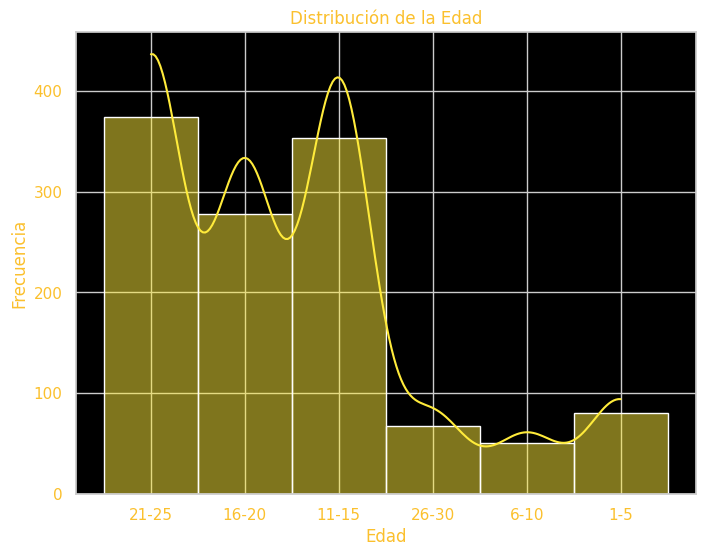

In [16]:
import matplotlib.colors as mcolors

# Defino una paleta personalizada (negro, blanco, amarillo y sus tonos)
custom_palette = {
    "background": "#000000",  # Negro
    "text": "#FFFFFF",        # Blanco
    "yellow": "#FFEB3B",      # Amarillo brillante
    "yellow_light": "#FFF59D",  # Amarillo claro
    "yellow_dark": "#FBC02D",  # Amarillo oscuro
}

# Establezco estilo y color de fondo
sns.set(style="whitegrid", palette=[custom_palette["yellow"], custom_palette["yellow_dark"], custom_palette["yellow_light"]])

# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(data["Age"], kde=True, color=custom_palette["yellow"], bins=20)
plt.title("Distribución de la Edad", color=custom_palette["yellow_dark"])
plt.xlabel("Edad", color=custom_palette["yellow_dark"])
plt.ylabel("Frecuencia", color=custom_palette["yellow_dark"])
plt.gca().set_facecolor(custom_palette["background"])
plt.xticks(color=custom_palette["yellow_dark"])
plt.yticks(color=custom_palette["yellow_dark"])
plt.show()

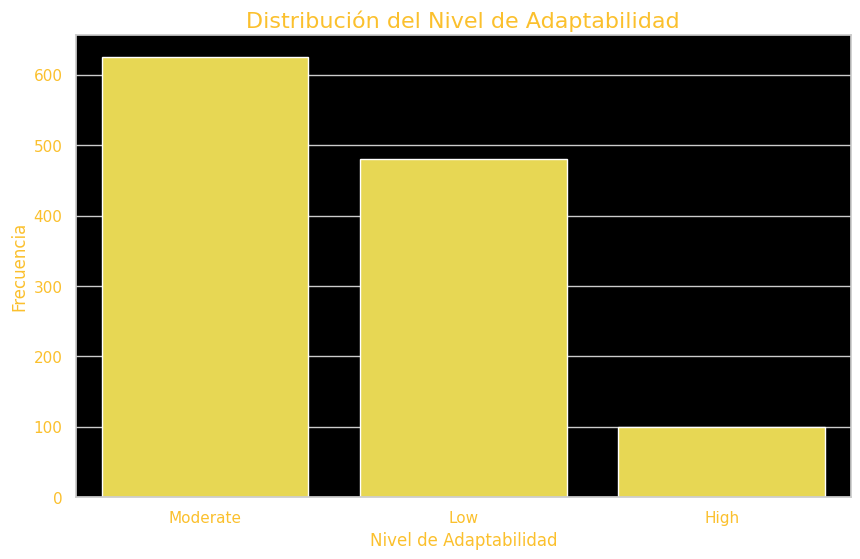

In [14]:
# Distribución del Nivel de Adaptabilidad
plt.figure(figsize=(10, 6))
sns.countplot(x="Adaptivity Level", data=data, color=custom_palette["yellow"])
plt.title("Distribución del Nivel de Adaptabilidad", fontsize=16, color=custom_palette["yellow_dark"])
plt.xlabel("Nivel de Adaptabilidad", fontsize=12, color=custom_palette["yellow_dark"])
plt.ylabel("Frecuencia", fontsize=12, color=custom_palette["yellow_dark"])
plt.gca().set_facecolor(custom_palette["background"])
plt.xticks(color=custom_palette["yellow_dark"])
plt.yticks(color=custom_palette["yellow_dark"])
plt.show()

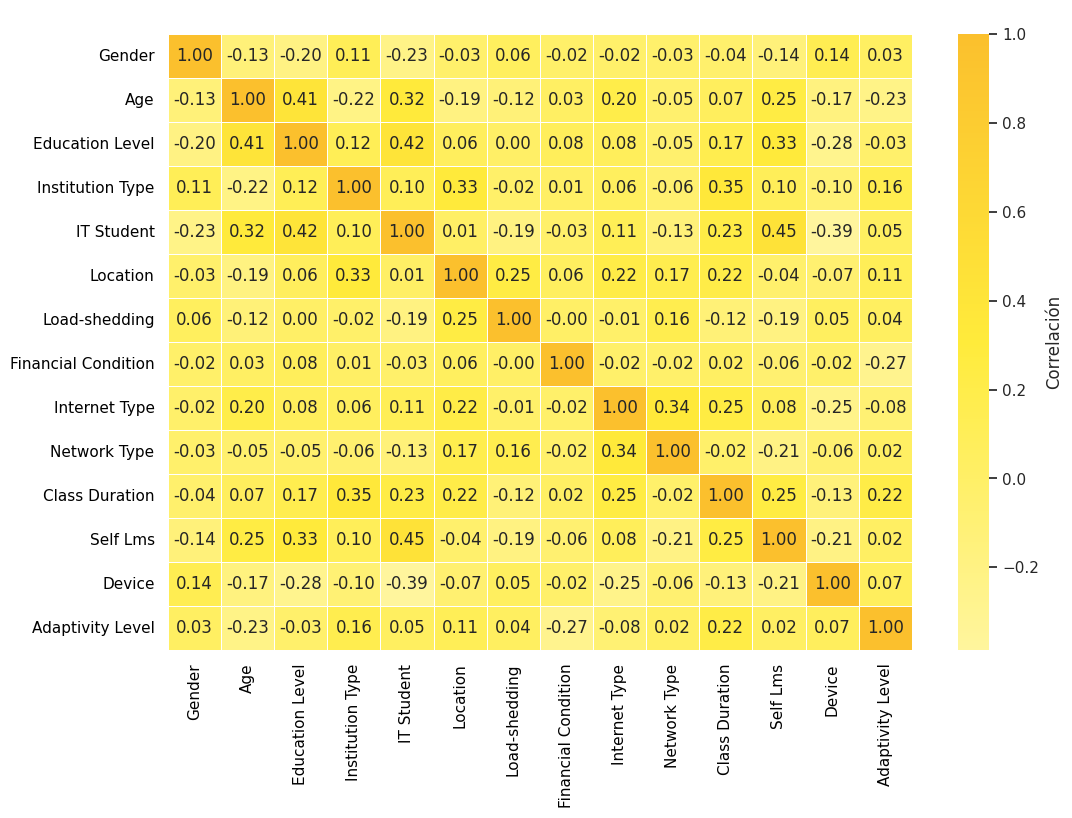

In [17]:
# Análisis de correlación
# Convertir las variables categóricas en variables numéricas para la correlación
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded = data.apply(label_encoder.fit_transform)
correlation_matrix = df_encoded.corr()

# Configuración de estilo y fondo
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Crear heatmap con la paleta personalizada
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.blend_palette(
        [custom_palette["yellow_light"], custom_palette["yellow"], custom_palette["yellow_dark"]],
        as_cmap=True
    ),
    linewidths=0.5,
    cbar_kws={"label": "Correlación"}
)

# Personalización del título, ejes y fondo
plt.title("Matriz de Correlación entre Variables", fontsize=16, color=custom_palette["text"])
plt.gca().set_facecolor(custom_palette["background"])  # Fondo del gráfico
plt.xticks(color=custom_palette["background"])
plt.yticks(color=custom_palette["background"])
plt.show()

/tmp/ipykernel_321828/2824372961.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFEB3B'` for the same effect.

  sns.countplot(x="Gender", hue="Adaptivity Level", data=data, color=custom_palette["yellow"])


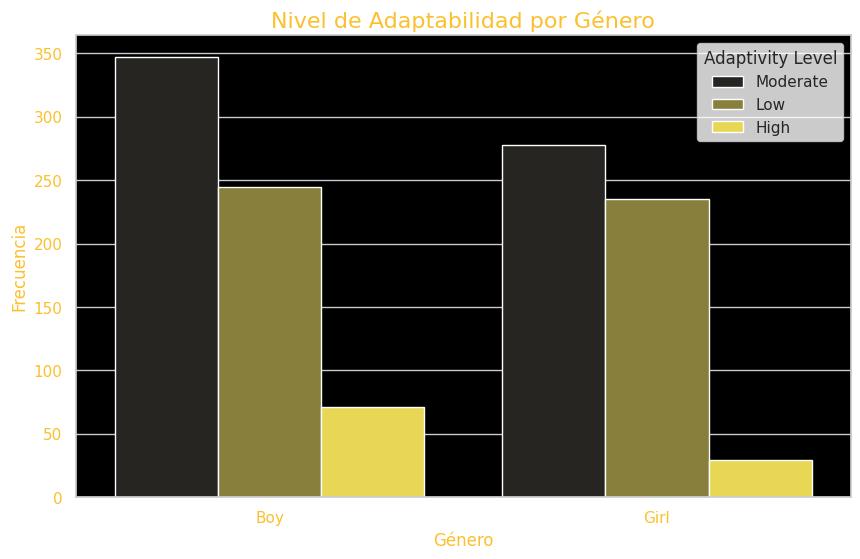

In [24]:
#Relaciones entre variables categóricas y numéricas
# Analizo si existen diferencias significativas en el Nivel de Adaptabilidad según las categorías de las variables

# Boxplot por género y Nivel de Adaptabilidad
plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", hue="Adaptivity Level", data=data, color=custom_palette["yellow"])
plt.title("Nivel de Adaptabilidad por Género", fontsize=16, color=custom_palette["yellow_dark"])
plt.xlabel("Género", fontsize=12, color=custom_palette["yellow_dark"])
plt.ylabel("Frecuencia", fontsize=12, color=custom_palette["yellow_dark"])
plt.gca().set_facecolor(custom_palette["background"])
plt.xticks(color=custom_palette["yellow_dark"])
plt.yticks(color=custom_palette["yellow_dark"])
plt.show()

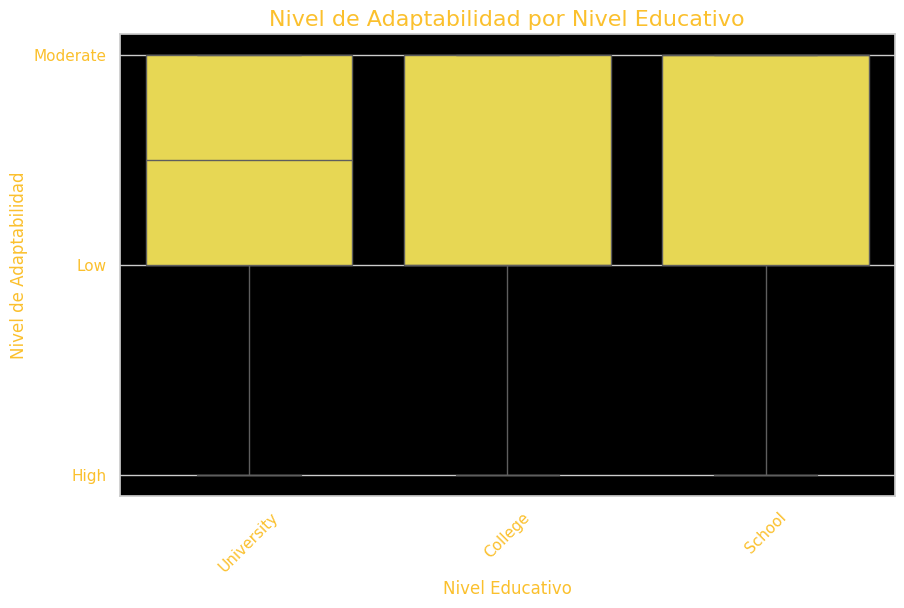

In [26]:
# Nivel Educativo y Nivel de Adaptabilidad
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education Level", y="Adaptivity Level", data=data, color=custom_palette["yellow"])
plt.title("Nivel de Adaptabilidad por Nivel Educativo", fontsize=16, color=custom_palette["yellow_dark"])
plt.xlabel("Nivel Educativo", fontsize=12, color=custom_palette["yellow_dark"])
plt.ylabel("Nivel de Adaptabilidad", fontsize=12, color=custom_palette["yellow_dark"])
plt.gca().set_facecolor(custom_palette["background"])
plt.xticks(rotation=45, color=custom_palette["yellow_dark"])
plt.yticks(color=custom_palette["yellow_dark"])
plt.show()

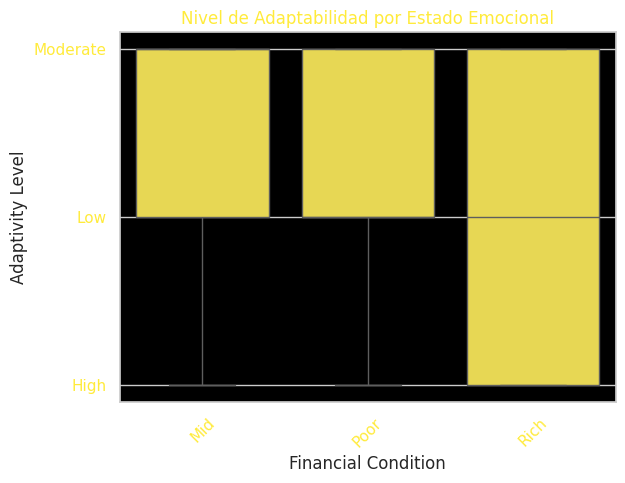

In [18]:
# Boxplot de Nivel de Adaptabilidad por Estado Emocional
sns.boxplot(data=data, x="Financial Condition", y="Adaptivity Level", color=custom_palette["yellow"])
plt.title("Nivel de Adaptabilidad por Estado Emocional", color=custom_palette["yellow"])
plt.gca().set_facecolor(custom_palette["background"])
plt.xticks(rotation=45, color=custom_palette["yellow"])
plt.yticks(color=custom_palette["yellow"])
plt.show()